# Python & Math Exercises
In this notebook we will practice some Python and Math.

Before running the notebook, run<br>
`conda create --name <env_name> --file requirements.txt`

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import codecs, json 
import PIL

## 1. Neural Networks are *just* linear algebra
![title]() 
<center><img src=https://www.kindpng.com/picc/m/52-526861_meme-linear-algebra-funny-hd-png-download.png      width=200 height=200 /></center>

In this task we will get a preview of the "magic" of neural networks while practicing some basic python functions.<br>
Our goal will be to recognize handwritten digits by multiplying their images with matrices from a neural network

<center><img src=https://raw.githubusercontent.com/GondorCallsForAid/Python-Video-Notebooks/main/Exercises/Images/neural_net_exercise_explanation.png /></center>


### 1.1 Load MNIST images as arrays using PIL and Numpy
Write a function that takes an integer from `0-9` and returns the according MNIST image as an array.<br>
You may use the imported functions/modules
<table><tr>
<td> <img src="mnist_images/0.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/1.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/2.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/3.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/4.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/5.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/6.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/7.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/8.jpg" style="width: 250px;"/> </td>
<td> <img src="mnist_images/9.jpg" style="width: 250px;"/> </td>
</tr></table>

In [2]:
from PIL import Image
from numpy import asarray

def load_image(digit):
    image = Image.open("mnist_images/" + str(digit) + ".jpg")
    return asarray(image)

test your function<br>
the shape of the image array should be `(28, 28)`

In [3]:
image_as_array = load_image(1)
image_as_array.shape

(28, 28)

<br>

### 1.2 Flattening the image
Write a function that flattens the image.

In [4]:
def flatten_image(img):
    return img.flatten()

test your function

In [5]:
image_flattened = flatten_image(image_as_array)
print(image_flattened.shape)

(784,)


the shape of the array should be `(784,)`

<br>

### 1.3 Multiply with matrices

In [6]:
obj_text = codecs.open("matrices", 'r', encoding='utf-8').read()
b_new = json.loads(obj_text)
matrices = list(b_new)

Write a function that multiplies the flattened image with the matrices taken from the neural network and returns the result.<br>
`matrices` is a list containing 3 matrices

In [7]:
def multiply_with_matrices(img, matrices):
    return img.dot(matrices[0]).dot(matrices[1]).dot(matrices[2])

test your function<br>
the shape of the array should be `(10, )`

In [8]:
output = multiply_with_matrices(image_flattened, matrices)
output.shape

(10,)

<br>

### 1.4 Apply softmax and get index of highest value
Write a function that applies the softmax function to our array and then returns the index of the highest value.

In [9]:
from scipy.special import softmax

In [10]:
def soft_highest_idx(arr):
    return np.argmax(softmax(arr))
    

In [11]:
recognized_digit = soft_highest_idx(output)
recognized_digit

1

<br>

### 1.5 Putting everything together
Run the following cell to check if everything worked out

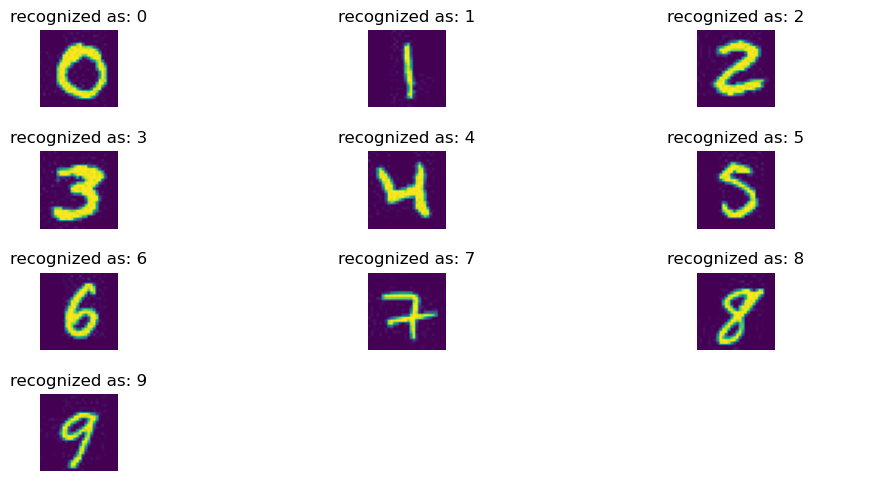

In [12]:
recognized_digits = []

for digit in range(10):
    image = flatten_image(load_image(digit))
    output = multiply_with_matrices(image, matrices)
    recognized_digit = soft_highest_idx(output)
    recognized_digits += [recognized_digit]


fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,5))
fig.tight_layout()

for idx, ax in enumerate(axes.flatten()):
    if idx < 10:
        ax.imshow(load_image(idx))
        ax.set_title("recognized as: " + str(recognized_digits[idx]))
    ax.axis("off")

<br>
<br>

## 2. From **Uniform** to **Normal** distribution (central limit theorem)
According to the central limit theorem the sampled means of distributions such as the uniform distribution will be normally distributed.<br>
Show this using numpy and matplotlib.<br>
[Video](https://www.youtube.com/watch?v=YAlJCEDH2uY)


In [13]:
sampled_means = [np.mean(np.random.uniform(low=0.0, high=1.0, size=100)) for _ in range(1000)]

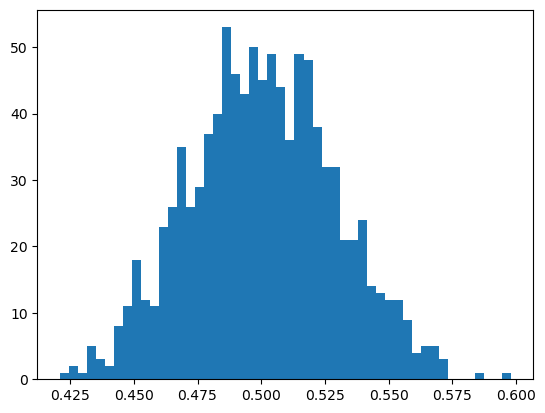

In [14]:
plt.hist(sampled_means, bins=50);